Import libraries

In [120]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

Mount Drive

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read Images 

In [122]:
D = []
y = np.array([])
for i in range(1,41):
  for j in range(1,11):
    img_name = "/content/drive/MyDrive/faces/s"+str(i)+"/"+str(j)+".pgm"
    img = cv2.imread(img_name,cv2.IMREAD_GRAYSCALE)
    img = img.flatten()
    D.append(img)
    y = np.append(y,i)
D = np.array(D)
D.shape   

(400, 10304)

Split Into Train and Test

In [123]:
testData = np.array([D[i] for i in range(0,400,2)])
trainData = np.array([D[i] for i in range(1,400,2)])

testLabel = np.array([y[i] for i in range(0,400,2)])
trainLabel = np.array([y[i] for i in range(1,400,2)])

In [124]:
print(trainData.shape)
print(testData.shape)

(200, 10304)
(200, 10304)


#Classification using PCA

In [125]:
mean = np.mean(trainData, axis=0)
print(mean)
mean.shape

[82.04  84.87  85.23  ... 77.23  74.35  73.355]


(10304,)

In [195]:
testMean= np.mean(testData, axis=0)
testCenter= testData- testMean

In [126]:
center= trainData - mean
cova=np.cov(center, rowvar=False, bias=True)

In [127]:
eigenVal, eigenVec = np.linalg.eigh(cova)
index= eigenVal.argsort()[::-1]
val=eigenVal[index]
vec=eigenVec[:,index]
diagonalMat=np.diag(val)
#print(diagonalMat)
print(val)
print("\n")
print(vec)
vec.shape 

[ 2.76913438e+06  2.14583158e+06  1.06497557e+06 ... -1.04389089e-09
 -1.49625428e-09 -1.89389774e-09]


[[ 0.00137559 -0.01038075 -0.01557967 ...  0.          0.
   0.        ]
 [ 0.0012908  -0.01510292 -0.01906547 ...  0.11103299  0.14232354
  -0.35438565]
 [ 0.00151768 -0.01517555 -0.01899798 ...  0.04343785 -0.28419215
   0.53742984]
 ...
 [ 0.00874152  0.00954999 -0.01296274 ... -0.02061136 -0.02074192
   0.0178128 ]
 [ 0.0072042   0.00769078 -0.01386214 ... -0.01111982  0.0152232
   0.00250571]
 [ 0.00844687  0.0068302  -0.01451087 ...  0.01159439  0.01729143
  -0.01306936]]
(10304, 10304)


In [ ]:
# eigenvals, eigenvecs = np.linalg.eig(cova)
# idx = eigenvals.argsort()[::-1]   
# eigenvals = eigenvals[idx]
# eigenvecs = eigenvecs[:,idx]
# print(eigenvals)
# print('\n')
# print(eigenvecs)

[ 2.76913438e+06+0.j  2.14583158e+06+0.j  1.06497557e+06+0.j ...
 -6.47694292e-11+0.j -7.68544765e-11+0.j -1.00470803e-10+0.j]


[[-0.00137559+0.j -0.01038075+0.j -0.01557967+0.j ... -0.00220032+0.j
  -0.00228492+0.j -0.00431041+0.j]
 [-0.0012908 +0.j -0.01510292+0.j -0.01906547+0.j ... -0.00010957+0.j
  -0.00126416+0.j -0.00427369+0.j]
 [-0.00151768+0.j -0.01517555+0.j -0.01899798+0.j ... -0.00593169+0.j
   0.00201948+0.j -0.0049894 +0.j]
 ...
 [-0.00874152+0.j  0.00954999+0.j -0.01296274+0.j ...  0.00529916+0.j
   0.00167579+0.j  0.00352763+0.j]
 [-0.0072042 +0.j  0.00769078+0.j -0.01386214+0.j ...  0.00888018+0.j
  -0.00520559+0.j  0.00335718+0.j]
 [-0.00844687+0.j  0.0068302 +0.j -0.01451087+0.j ... -0.00409754+0.j
   0.00100769+0.j -0.00390398+0.j]]


In [128]:
def knn(reducedTrainD, reducedTestD, labelsTrain, labelsTest, k ):
  c=KNeighborsClassifier(n_neighbors = k)
  c.fit(reducedTrainD,labelsTrain)
  labelsPred=c.predict(reducedTestD)
  accuracy = metrics.accuracy_score(labelsTest, labelsPred)
  #print("accuracy:", accuracy)
  return accuracy

In [200]:
alpha=np.array([0.8,0.85,0.9,0.95])
accuracies=np.array([])
totval= np.sum(val)
explained=0
for a in alpha:
  r=0
  sum=0
  while explained <= a:
    sum= sum+val[r]
    explained=sum/totval
    r=r+1
  
  if a==0.8:
    p1=vec[:,:r]
    reducedTrain1=np.dot(center, p1)
    reducedTest1=np.dot(testCenter, p1)
  elif a==0.85:
    p2=vec[:,:r]
    reducedTrain2=np.dot(center, p2)
    reducedTest2=np.dot(testCenter, p2)
  elif a==0.9:
    p3=vec[:,:r]
    reducedTrain3=np.dot(center, p3)
    reducedTest3=np.dot(testCenter, p3)
  else:
    p4=vec[:,:r]
    reducedTrain4=np.dot(center, p4)
    reducedTest4=np.dot(testCenter, p4)
    
  for k in range(1,8,2):
    print("\n")
    print("alpha =", a , "dimensions=", r)
    print("n-neighbors=", k)
    if a==0.8:
      a1=knn(reducedTrain1,reducedTest1,trainLabel, testLabel,k)
      accuracies=np.append(accuracies,a1)
      print("accuracy:", a1)
    elif a==0.85:
      a2=knn(reducedTrain2,reducedTest2,trainLabel, testLabel,k)
      accuracies=np.append(accuracies,a2)
      print("accuracy:", a2)
    elif a==0.9:
      a3=knn(reducedTrain3,reducedTest3,trainLabel, testLabel,k)
      accuracies=np.append(accuracies,a3)
      print("accuracy:", a3)
    else:
       a4=knn(reducedTrain4,reducedTest4,trainLabel, testLabel,k)
       accuracies=np.append(accuracies,a4)
       print("accuracy:", a4)




alpha = 0.8 dimensions= 37
n-neighbors= 1
accuracy: 0.93


alpha = 0.8 dimensions= 37
n-neighbors= 3
accuracy: 0.845


alpha = 0.8 dimensions= 37
n-neighbors= 5
accuracy: 0.825


alpha = 0.8 dimensions= 37
n-neighbors= 7
accuracy: 0.77


alpha = 0.85 dimensions= 53
n-neighbors= 1
accuracy: 0.94


alpha = 0.85 dimensions= 53
n-neighbors= 3
accuracy: 0.855


alpha = 0.85 dimensions= 53
n-neighbors= 5
accuracy: 0.835


alpha = 0.85 dimensions= 53
n-neighbors= 7
accuracy: 0.765


alpha = 0.9 dimensions= 77
n-neighbors= 1
accuracy: 0.94


alpha = 0.9 dimensions= 77
n-neighbors= 3
accuracy: 0.845


alpha = 0.9 dimensions= 77
n-neighbors= 5
accuracy: 0.815


alpha = 0.9 dimensions= 77
n-neighbors= 7
accuracy: 0.75


alpha = 0.95 dimensions= 116
n-neighbors= 1
accuracy: 0.935


alpha = 0.95 dimensions= 116
n-neighbors= 3
accuracy: 0.85


alpha = 0.95 dimensions= 116
n-neighbors= 5
accuracy: 0.81


alpha = 0.95 dimensions= 116
n-neighbors= 7
accuracy: 0.735


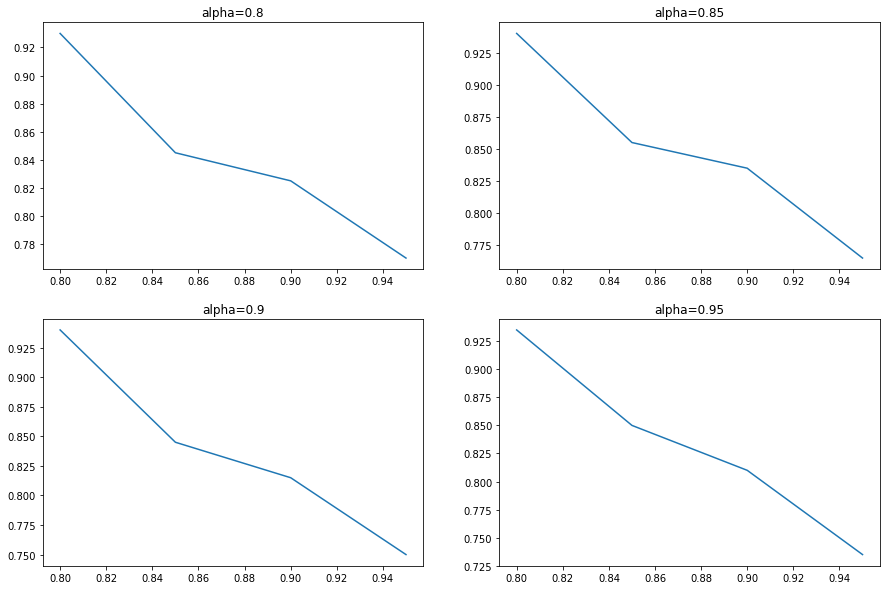

In [198]:
figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(alpha, accuracies[0:4])
axis[0, 0].set_title("alpha=0.8")

axis[0, 1].plot(alpha, accuracies[4:8])
axis[0, 1].set_title("alpha=0.85")

axis[1, 0].plot(alpha, accuracies[8:12])
axis[1, 0].set_title("alpha=0.9")

axis[1, 1].plot(alpha, accuracies[12:16])
axis[1, 1].set_title("alpha=0.95")

plt.show()

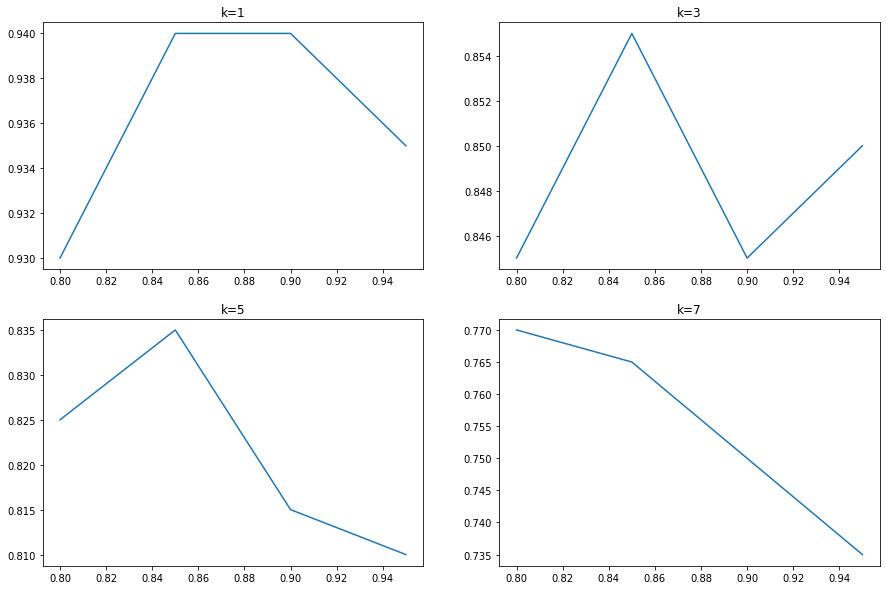

In [199]:

figure, axis= plt.subplots(2,2, figsize=(15,10))
axis[0, 0].plot(alpha, accuracies[0:16:4])
axis[0, 0].set_title("k=1")

axis[0, 1].plot(alpha, accuracies[1:16:4])
axis[0, 1].set_title("k=3")

axis[1, 0].plot(alpha, accuracies[2:16:4])
axis[1, 0].set_title("k=5")

axis[1, 1].plot(alpha, accuracies[3:16:4])
axis[1, 1].set_title("k=7")

plt.show()